In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [9]:
df = pd.read_csv('SHERP_tweeter_data.csv')

In [10]:
df.head()

,gender,name,display_name,bio,favorites_count,followers_count,list_memberships,tweets_retweets_count,following_count,acct_created,location
0,f,b'BijalPTrivedi',b'Bijal P Trivedi',"b'Science journalist, author of Breath from Sa...",0,7,1,1,5,2020-09-08 21:43:21,b'Washington DC'
1,m,b'AbeMusselman',b'Abe Musselman',b'Science writer and science reader. SHERP 39....,180,34,1,23,83,2020-03-09 23:00:23,b''
2,f,b'casey_crownhart',b'CaseyCrownhart',"b'Reader, writer, plant mom \xf0\x9f\x8c\xb1 S...",169,58,1,60,154,2019-10-27 16:36:49,b''
3,m,b'raorr108',b'Rahul Rao',"b'Freelance journalist, science writer, and so...",14,59,3,4,40,2019-10-22 14:53:57,b'NYC'
4,f,b'Anu__Dave',b'Anu',b'Science and technology writer | #sherp38 @ny...,210,258,2,51,332,2019-10-06 17:55:45,b'NYC via Canada \xf0\x9f\x87\xa8\xf0\x9f\x87\...


In [11]:
df.groupby('gender').sum()

,favorites_count,followers_count,list_memberships,tweets_retweets_count,following_count
gender,,,,,
f,1091246,482414,20193,592624,202900
m,464401,519140,14457,430056,73583
n,31300,3140,88,7664,4699


In [12]:
df.groupby('gender').count()

,name,display_name,bio,favorites_count,followers_count,list_memberships,tweets_retweets_count,following_count,acct_created,location
gender,,,,,,,,,,
f,188,188,188,188,188,188,188,188,188,188
m,73,73,73,73,73,73,73,73,73,73
n,2,2,2,2,2,2,2,2,2,2


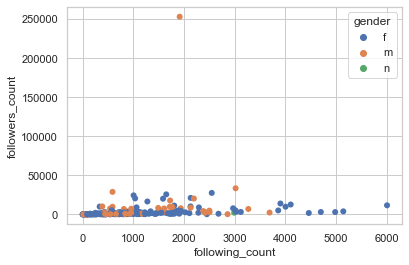

In [15]:
sns.scatterplot(x="following_count", y="followers_count",
                hue="gender",
                sizes=(1, 8), linewidth=0,
                data=df)

There is an outlier...a male has more than 250,000. Who is that?

In [16]:
df.groupby('followers_count').max()

,gender,name,display_name,bio,favorites_count,list_memberships,tweets_retweets_count,following_count,acct_created,location
followers_count,,,,,,,,,,
7,f,b'BijalPTrivedi',b'Bijal P Trivedi',"b'Science journalist, author of Breath from Sa...",0,1,1,5,2020-09-08 21:43:21,b'Washington DC'
11,f,b'CaroleBullock',b'Carole Bullock',b'',0,2,4,2,2011-06-06 14:31:07,b''
16,f,b'JuliaKarow',b'Julia Karow',b'',0,2,0,2,2012-11-20 02:19:42,b''
20,f,b'anika_hazra',b'Anika Hazra',b'Science Communicator | Toronto/Chicago/Ottaw...,1,2,1,26,2016-01-11 01:59:14,"b'Ottawa, ON'"
24,m,b'hebbmeme',b'Mike Orcutt',b'what fires together wires together',0,2,49,63,2009-09-23 21:24:22,"b'The Big City, America'"
...,...,...,...,...,...,...,...,...,...,...
25603,f,b'JossFong',b'Joss Fong',"b'Video, science & tech | joss@vox.com'",2222,344,3897,1651,2009-02-26 20:41:49,b''
27495,f,b'roseveleth',b'Rose Eveleth \xe2\x96\xb7\xe2\x96\xb7',b'journalist \xe3\x80\xb0\xe3\x80\xb0 I run @f...,16102,919,1070,2549,2009-06-05 14:29:35,b''
28815,m,b'ferrisjabr',b'Ferris Jabr',b'science writer \xe2\x9c\xb5 contributing wri...,124,1087,5973,591,2009-06-08 06:50:16,"b'Portland, OR'"


Oh my...the host of Chopped!?!

In [24]:
df_minus_allen = df[df.followers_count != 253034]
df_minus_allen.tail()

,gender,name,display_name,bio,favorites_count,followers_count,list_memberships,tweets_retweets_count,following_count,acct_created,location
258,f,b'LauraGeggel',b'Laura Geggel',"b""I'm a transplanted Seattleite living in New ...",5562,2946,100,3886,4985,2008-02-04 19:46:52,b'New York'
259,f,b'CatherineDold',b'Catherine Dold',b'Freelance writer/editor #health #biopharm #a...,281,1468,125,1829,1687,2008-02-02 18:31:17,"b'Boulder, Colorado'"
260,m,b'kerthan',b'Ker Than',b'Sci writer with interests spanning anthropol...,118,902,78,557,842,2008-01-24 16:26:52,b'California'
261,f,b'karina4848',b'karina4848',b'Editor of Scholastic MATH (an awesome math m...,0,81,8,385,90,2007-12-14 03:16:17,"b'New York, NY'"
262,f,b'lindy2350',b'Melinda Wenner Moyer',b'Science journalist. Contributing editor @Sci...,16180,13900,624,5181,3904,2007-09-04 19:33:08,"b'Hudson Valley, NY'"


In [31]:
df_minus_full = df_minus_allen[df_minus_allen.gender != 'n']

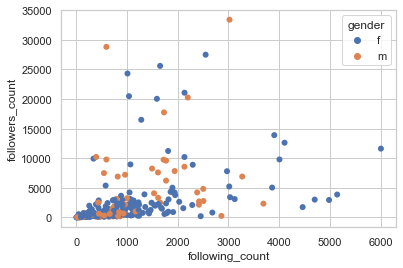

In [32]:
sns.scatterplot(x="following_count", y="followers_count",
                hue="gender",
                sizes=(1, 8), linewidth=0,
                data=df_minus_full)

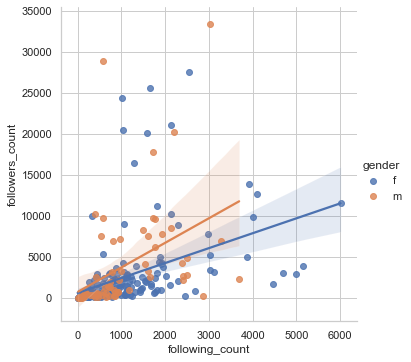

In [33]:
sns.lmplot(x="following_count", y="followers_count",
                hue="gender",
                data=df_minus_full)

In [34]:
df_minus_full.describe()

,favorites_count,followers_count,list_memberships,tweets_retweets_count,following_count
count,260.000000,260.000000,260.000000,260.000000,260.000000
mean,5955.765385,2878.923077,123.657692,3839.030769,1056.026923
std,15637.274487,5114.775109,209.991805,7421.792248,998.820290
min,0.000000,7.000000,0.000000,0.000000,2.000000
25%,179.750000,326.000000,12.750000,327.250000,389.750000
50%,1196.500000,982.000000,47.500000,1164.000000,791.000000
75%,4400.250000,2719.750000,133.750000,3888.750000,1436.000000
max,149293.000000,33404.000000,1754.000000,67290.000000,6008.000000


In [37]:
df_minus_full.groupby('gender').describe()

favorites_count                                                  \
                 count         mean           std  min     25%     50%   
gender                                                                   
f                188.0  5804.500000  16232.084550  0.0  234.75  1220.5   
m                 72.0  6350.736111  14064.943607  0.0  113.00   720.0   

                          followers_count               ...  \
            75%       max           count         mean  ...   
gender                                                  ...   
f       4340.00  149293.0           188.0  2566.031915  ...   
m       5331.75   79475.0            72.0  3695.916667  ...   

       tweets_retweets_count          following_count               \
                         75%      max           count         mean   
gender                                                               
f                    3162.75  67290.0           188.0  1079.255319   
m                    7182.25  32818.0            72.0   995.375000   

                                                           
                std   min     25%    50%      75%     max  
gender                                                     
f       1040.274906   2.0  410.25  800.5  1345.75  6008.0  
m        885.380708  16.0  386.25  717.0  1609.75  3690.0  

[2 rows x 40 columns]